In [1]:
import qiskit

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\anirudh\appdata\local\temp\pip-req-build-7v4vww6p
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: chardet<4,>=3.0.2 in c:\users\anirudh\anaconda3\lib\site-packages (from requests>=2.19->qiskit-ibmq-provider==0.11.1->qiskit->qiskit-textbook==0.1.0) (3.0.4)

  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17001 sha256=1fbe30022f5d3e0ef551f87cd264664e122b65bf8d003a7614ce41e84ad06201
  Stored in directory: C:\Users\ANIRUDH\AppData\Local\Temp\pip-ephem-wheel-cache-oejylz_8\wheels\80\c4\dd\b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [4]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [5]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

In [6]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass
    elif msg == "10":
        qc.x(qubit)
    elif msg == "01":
        qc.z(qubit)
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("Invalid Message: Sending '00'")

In [7]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

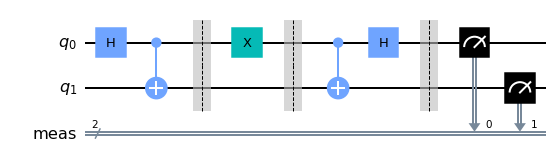

In [8]:
qc = QuantumCircuit(2)
create_bell_pair(qc, 0, 1)
qc.barrier()
message = "10"
encode_message(qc, 0, message)
qc.barrier()
decode_message(qc, 0, 1)
qc.measure_all()
qc.draw(output = "mpl")

{'10': 1024}


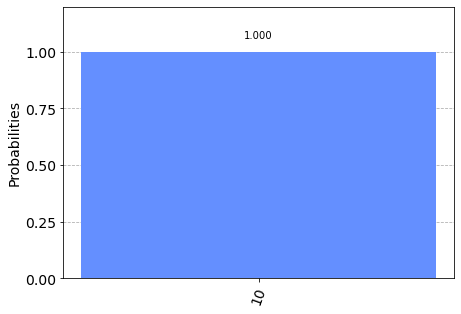

In [11]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)